In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from plot_drift import plot_drift
from plot_trajectory import plot_trajectory

In [3]:
!./run.sh
output_dir = "output/dust_drift/"

make: Entering directory '/home/thomas/repo/fargo/fargocpt/src'
mpic++  accretion.o axilib.o backtrace.o boundary_conditions.o cfl.o circumplanetary_mass.o commbound.o config.o constants.o data.o find_cell_id.o Force.o fpe.o frame_of_reference.o gas_torques.o global.o handle_signals.o hydro_dt_logger.o init.o Interpret.o logging.o LowTasks.o main.o massflow_tracker.o mpi_utils.o nongnu.o opacity.o open-simplex-noise.o options.o output.o parameters.o Pframeforce.o polargrid.o pvte_law.o quantities.o radialarray.o radialgrid.o RungeKutta.o selfgravity.o SideEuler.o simulation.o SourceEuler.o split.o start_mode.o stress.o sts.o Theo.o TransportEuler.o units.o util.o particles/dust_diffusion.o particles/particle.o particles/particles.o random/random.o nbody/planetary_system.o nbody/planet.o viscosity/artificial_viscosity.o viscosity/viscosity.o viscosity/viscous_radial_speed.o -Wall -Wextra -Wmissing-declarations -Werror=redundant-decls -DOMPI_SKIP_MPICXX -Werror=format-security -Wno-unkno

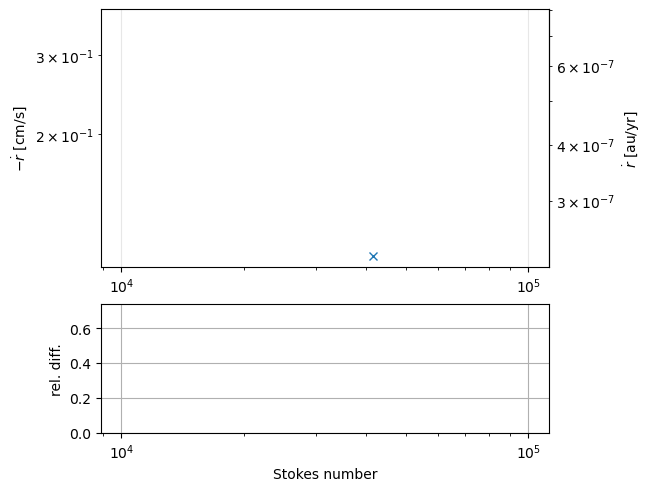

In [4]:
plot_drift(output_dir);

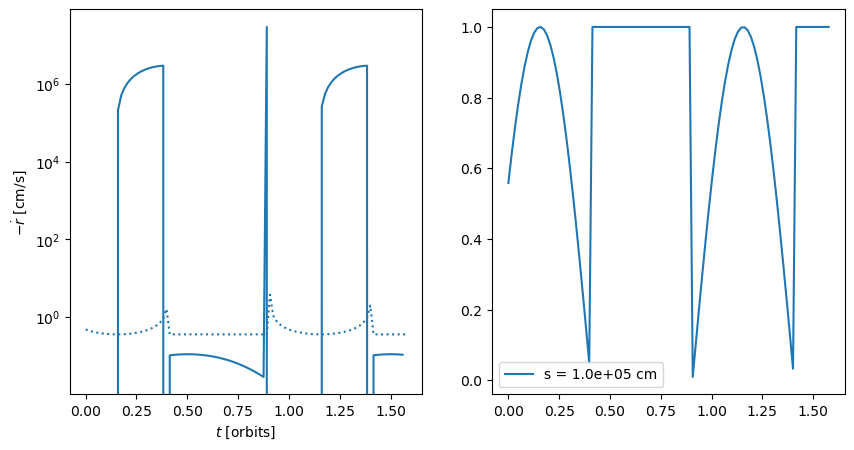

In [5]:
plot_trajectory(output_dir);

In [6]:
2.65*np.pi*1e-5/2

4.162610266006476e-05

Stokes number calculation is correct in the FARGO code in case of Epstein drag only

In [7]:
np.sqrt(2*np.pi)

2.5066282746310002

In [8]:
4.16/1.51

2.7549668874172184

In [ ]:
1/np.sqrt(1.4)

0.8451542547285166

In [ ]:
1/1.4

0.7142857142857143

In [ ]:
import astropy.units as u
import astropy.constants as const

Gas density in cgs

In [ ]:
rhog = (10*u.g/u.cm**2 / (np.sqrt(2*np.pi) * 0.05* 1 * u.au)).to("g/cm3")
rhog

<Quantity 5.33352886e-12 g / cm3>

mean free path according to HB03 https://iopscience.iop.org/article/10.1086/345472/pdf eq 20
l (cm) = 4.72e-9 / (rho_g / (g/cm3)) cm

In [ ]:
l = 4.72e-9 *u.cm / rhog.to_value("g/cm3")
l

<Quantity 884.96755595 cm>

For a s = 1e-4 cm particle

In [ ]:
f = (1e-4*u.cm) / (1e-4*u.cm + l)
f

<Quantity 1.1299848e-07>

In [ ]:
m0 = 2.35*u.u
temperature = 626.9*u.K
vthermal = np.sqrt(8 * const.k_B * temperature / (np.pi*m0))

In [ ]:
vthermal.decompose()

<Quantity 2376.57953771 m / s>

In [ ]:
np.sqrt(8/np.pi)*0.05

0.07978845608028655

in the code at r=1, vthermal = 0.07979 calcualting from temperature

In [ ]:
np.sqrt(8/np.pi)*0.05

0.07978845608028655

In Picogna et al 2015, Fig. C2 shows the theoretical drift rate for a particle of stokes number  7.4e-4, which is roughly 5e-6 in the units shown.
The axis is labeled as cm/s, however, the order of magnitude fits for au/yr

In [ ]:
sigmaslope = -1
temperatureslope = -1
Mstar = 0.05*u.solMass
h = 0.05
r = 1*u.au
stokes = 7.4e-4
vK = np.sqrt(const.G*Mstar/r).decompose()
eta = h**2 * (sigmaslope + temperatureslope)
vdrift = eta*vK/(stokes + stokes**-1)
vdrift.to("au/yr")

<Quantity -5.19826188e-06 AU / yr>

<Quantity -0.00333003 m / s>

In [ ]:
vK

<Quantity 29784.69182968 m / s>

In [ ]:
np.sqrt(8/np.pi)*0.05*vK

<Quantity 2376.47457592 m / s>

4425000.0

In [ ]:
885/1e-4/2

In [ ]:
10*(1*u.au).to_value("cm")

149597870700000.0

In [ ]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from drift_theo import vdrift_theo
vdrift_theo(7.4e-4, 1*u.au, Mstar=0.55*u.solMass, h=0.05).to("au/yr")

<Quantity -1.72406842e-05 AU / yr>

In [14]:
from load_dust import construct_dust_trajectories
import matplotlib.pyplot as plt
import numpy as np

p = construct_dust_trajectories("output/dust_drift/")[0]

[0.5582617] AU [-0.82966492] AU [1.] AU
[0.638301] AU [-0.76978687] AU [1.] AU
[0.71196261] AU [-0.70221738] AU [1.] AU
[0.77851052] AU [-0.62763155] AU [1.] AU
[0.83727981] AU [-0.54677464] AU [1.] AU
[0.88768328] AU [-0.46045454] AU [1.] AU
[0.92921732] AU [-0.36953373] AU [1.] AU
[0.96146691] AU [-0.27492067] AU [1.] AU
[0.98410985] AU [-0.17756068] AU [1.] AU
[0.99691989] AU [-0.07842657] AU [1.] AU
[0.99976904] AU [0.02149116] AU [1.] AU
[0.99262882] AU [0.12119415] AU [1.] AU
[0.97557059] AU [0.21968621] AU [1.] AU
[0.94876477] AU [0.31598324] AU [1.] AU
[0.91247921] AU [0.40912307] AU [1.] AU
[0.86707646] AU [0.49817507] AU [1.] AU
[0.81301017] AU [0.58224948] AU [1.] AU
[0.75082055] AU [0.66050624] AU [1.] AU
[0.68112898] AU [0.73216344] AU [1.] AU
[0.6046318] AU [0.79650511] AU [1.] AU
[0.52209333] AU [0.85288836] AU [1.] AU
[0.43433828] AU [0.90074983] AU [1.] AU
[0.34224347] AU [0.93961131] AU [1.] AU
[0.24672907] AU [0.9690845] AU [1.] AU
[0.14874943] AU [0.98887492] AU [1.

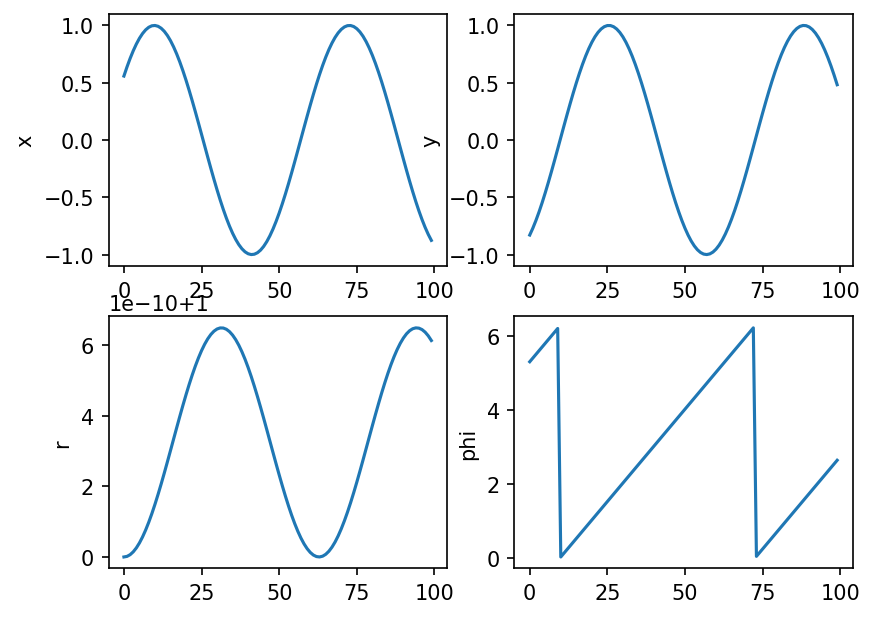

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=2, dpi=150)

for ax, name in zip(axes.ravel(), ["x", "y", "r", "phi"]):
    ax.plot(p[name])
    ax.set_ylabel(name)